This notebook is by Anastasia Ruzmaikina.

In this notebook we analyze the time series of climate data for Central England's average monthly temperatures.
This dataset contains records of the average monthly temperatures from January 1659 till September 2021.

The dataset contains 4356 points, but we use a subset of 861 datapoints in order to make the plots clearer.

We find the classical decomposition of the temperature time-series into the trend, seasonal and residual components, as well as the STL decomposition, we detrend and deseanolize the data, we find the autocorrelations and partial autocorrelations of the time series, we use ADF and KPSS tests to check the statinarity of the time series.

The methods used in this notebook were learned by the author in the "Time Series" course from the Machine Learning University on machinelearningplus.com

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
%matplotlib inline
from datetime import datetime, timedelta
from dateutil.relativedelta import *

First we import the dataset and look at the data.

In [2]:
weather = pd.read_csv("climate_england.csv")
weather

,Unnamed: 0,year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,total
0,0,1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1,1,1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
2,2,1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
3,3,1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
4,4,1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,358,2017,4.0,6.1,8.7,8.9,13.2,16.0,16.8,15.6,13.5,12.4,6.8,4.8,10.58
359,359,2018,5.3,2.9,4.9,9.8,13.2,16.1,19.1,16.6,13.7,10.6,8.3,6.9,10.68
360,360,2019,4.0,6.7,7.8,9.1,11.1,14.2,17.5,17.1,14.3,10.0,6.2,5.8,10.34
361,361,2020,6.4,6.3,6.7,10.4,12.5,15.3,15.7,17.6,13.9,10.5,8.5,5.0,10.76


The column "Unnamed: 0" carries no information, so we drop it.

In [3]:
weather = weather.drop("Unnamed: 0", axis='columns')
weather

,year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,total
0,1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1,1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
2,1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
3,1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
4,1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2017,4.0,6.1,8.7,8.9,13.2,16.0,16.8,15.6,13.5,12.4,6.8,4.8,10.58
359,2018,5.3,2.9,4.9,9.8,13.2,16.1,19.1,16.6,13.7,10.6,8.3,6.9,10.68
360,2019,4.0,6.7,7.8,9.1,11.1,14.2,17.5,17.1,14.3,10.0,6.2,5.8,10.34
361,2020,6.4,6.3,6.7,10.4,12.5,15.3,15.7,17.6,13.9,10.5,8.5,5.0,10.76


We can graph average temperatures for each month in a different color.

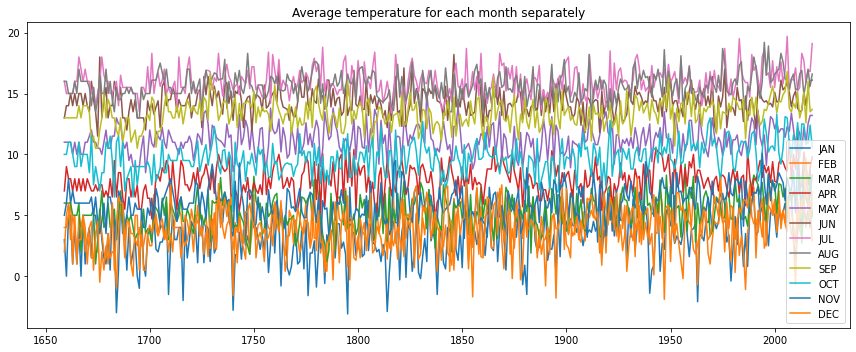

In [4]:
#plotting the data for each month
l = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", 'JUL', "AUG", "SEP", "OCT", "NOV", "DEC"]
plt.rcParams["figure.figsize"] = [12,5]
plt.rcParams["figure.autolayout"] =True    
for item in l:
    plt.plot(weather.year[:-3], weather[item][:-3], label = item)
plt.legend(loc = 'lower right')
plt.title("Average temperature for each month separately")
plt.show()

We can summarize the dataset by a boxplot which shows a five number summary for each month.

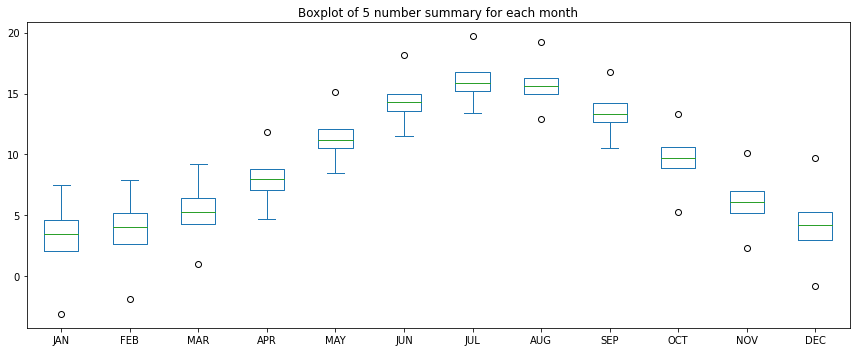

In [5]:
dw = pd.DataFrame({"JAN": weather["JAN"][:-3].describe()[3:] })
for item in l:
    dw[item] = weather[item][:-3].describe()[3:]
plt.rcParams["figure.figsize"] = [12,5]
plt.rcParams["figure.autolayout"] =True
ax = dw[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].plot(kind='box', title='Boxplot of 5 number summary for each month')
plt.show()

To analyze the dataset as a time series, it is better if the data is displayed as a one dimensional array as a function of time. So we concatinate the rows of the dataframe, including only the monthly temperatures.

In [6]:
arr = []
#get the data formatted as a single numpy array
for j in range(len(weather)):
    for i in range(1,13,1):
        arr.append(weather.iloc[j,i])
arr = np.array(arr[:-3])
print("All temperatures as an array:")
print(arr)
print("All temperatures by month:")
print(weather)  #array has correct start and end points when compared to the dataframe (we don't want the -99.9 points in the array)

All temperatures as an array:
[ 3.   4.   6.  ... 17.7 15.8 15.9]
All temperatures by month:
     year  JAN  FEB  MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV  \
0    1659  3.0  4.0  6.0   7.0  11.0  13.0  16.0  16.0  13.0  10.0   5.0   
1    1660  0.0  4.0  6.0   9.0  11.0  14.0  15.0  16.0  13.0  10.0   6.0   
2    1661  5.0  5.0  6.0   8.0  11.0  14.0  15.0  15.0  13.0  11.0   8.0   
3    1662  5.0  6.0  6.0   8.0  11.0  15.0  15.0  15.0  13.0  11.0   6.0   
4    1663  1.0  1.0  5.0   7.0  10.0  14.0  15.0  15.0  13.0  10.0   7.0   
..    ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
358  2017  4.0  6.1  8.7   8.9  13.2  16.0  16.8  15.6  13.5  12.4   6.8   
359  2018  5.3  2.9  4.9   9.8  13.2  16.1  19.1  16.6  13.7  10.6   8.3   
360  2019  4.0  6.7  7.8   9.1  11.1  14.2  17.5  17.1  14.3  10.0   6.2   
361  2020  6.4  6.3  6.7  10.4  12.5  15.3  15.7  17.6  13.9  10.5   8.5   
362  2021  3.1  5.1  7.2   6.4  10.1  15.5  17.7  15.8  15.9 -99.9 -99.

We want to add the time column so that each point in the numpy array of temperatures corresponds to a correct time.

In [11]:
start = datetime.strptime('1659-01', '%Y-%m')
all_dates = [start + relativedelta(months =+ x) for x in range(363*12-3)]  
print(all_dates[0:5])  #this is to index the data frame with the month and year

[datetime.datetime(1659, 1, 1, 0, 0), datetime.datetime(1659, 2, 1, 0, 0), datetime.datetime(1659, 3, 1, 0, 0), datetime.datetime(1659, 4, 1, 0, 0), datetime.datetime(1659, 5, 1, 0, 0)]


Now we construct a dataframe dfw out of the array of temperatures and the array of times, where the time column is called 'ds', and the temperature column is called 'temperature'.

In [12]:
dfw = pd.DataFrame(all_dates, columns = ['ds'])
dfw['temperature'] = arr
dfw = dfw[3492:]
dfw = dfw.reset_index()
dfw = dfw.drop("index", axis = 'columns')
dfw

,ds,temperature
0,1950-01-01 00:00:00,4.2
1,1950-02-01 00:00:00,5.3
2,1950-03-01 00:00:00,7.4
3,1950-04-01 00:00:00,7.6
4,1950-05-01 00:00:00,11.3
...,...,...
856,2021-05-01 00:00:00,10.1
857,2021-06-01 00:00:00,15.5
858,2021-07-01 00:00:00,17.7
859,2021-08-01 00:00:00,15.8


Now we plot our dataframe dfw, to see the temperature as a function of time.

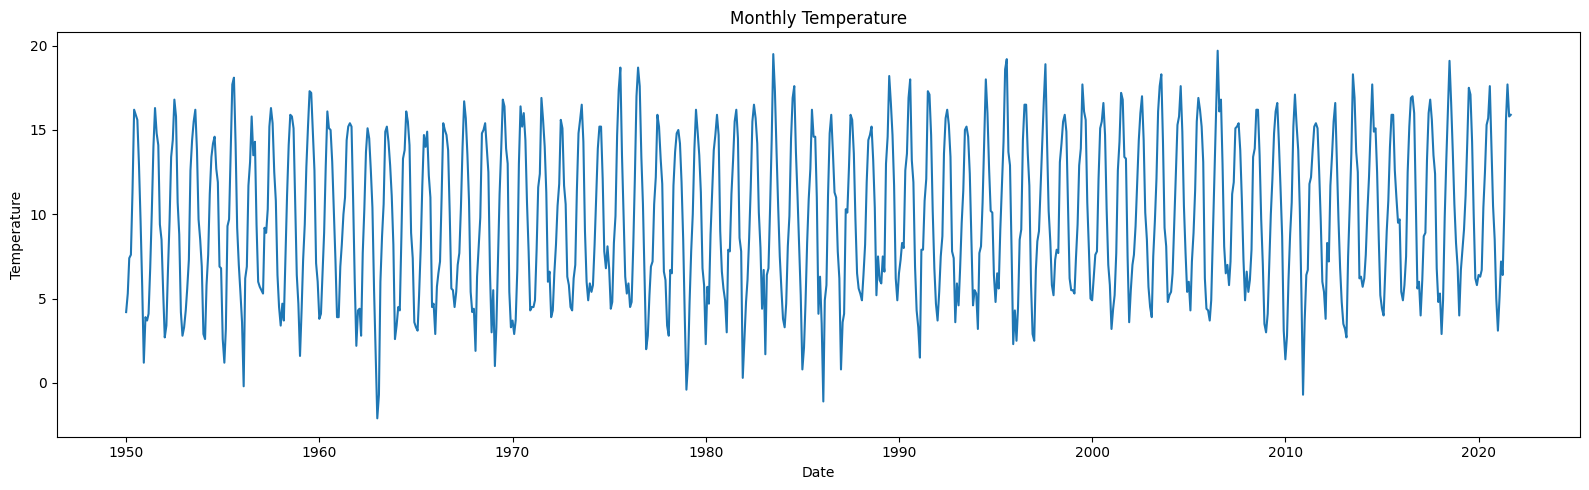

In [14]:
# Draw Plot
def plot_df(dfw, x, y, title="", xlabel='Date', ylabel='Temperature', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(dfw, x=dfw.ds, y=dfw.temperature, title='Monthly Temperature')

We see that the data in dfw exhibits strong seasonal oscillations. It makes sense to do a seasonal decomposition.
We cannot use a multiplicative model, because negative values are possible. So we only use the additive model.

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Additive Decomposition
result_add = seasonal_decompose(dfw['temperature'], model='additive', period=12, extrapolate_trend='freq')

We can plot the time series and the individual components: trend, seasonal and residual.

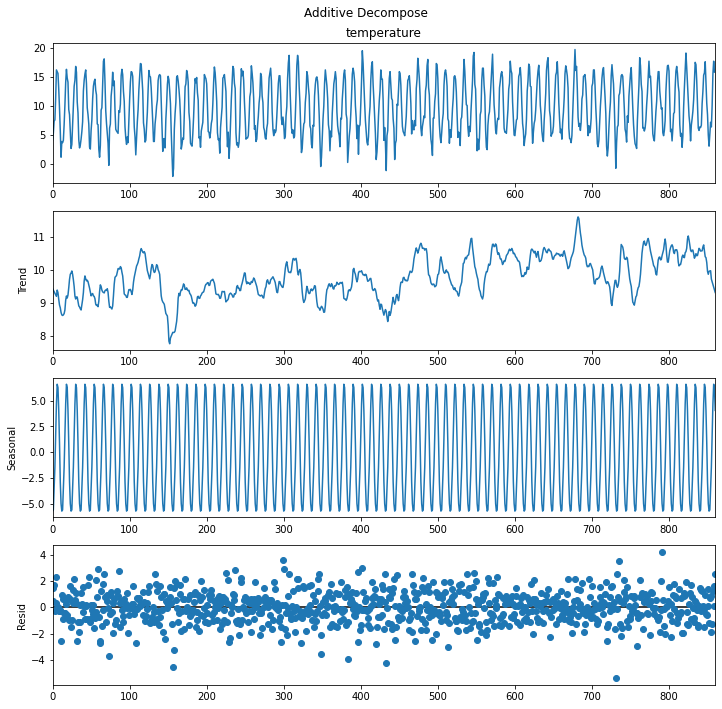

In [16]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=12)
plt.show()

We see that the decomposition above is into three components: trend, seasonal and residual. Observe that the seasonal component is strictly periodic. Notice that the residual component looks uniform and does not exhibit any patterns, which means that the additive model is a good fit.

STL decomposition is a seasonal-trend decomposition that uses Loess smoothing (using locally fitted regression models) to decompose the series into trend, seasonal and residual components, and as a result the seasonal component is no longer strictly periodic.

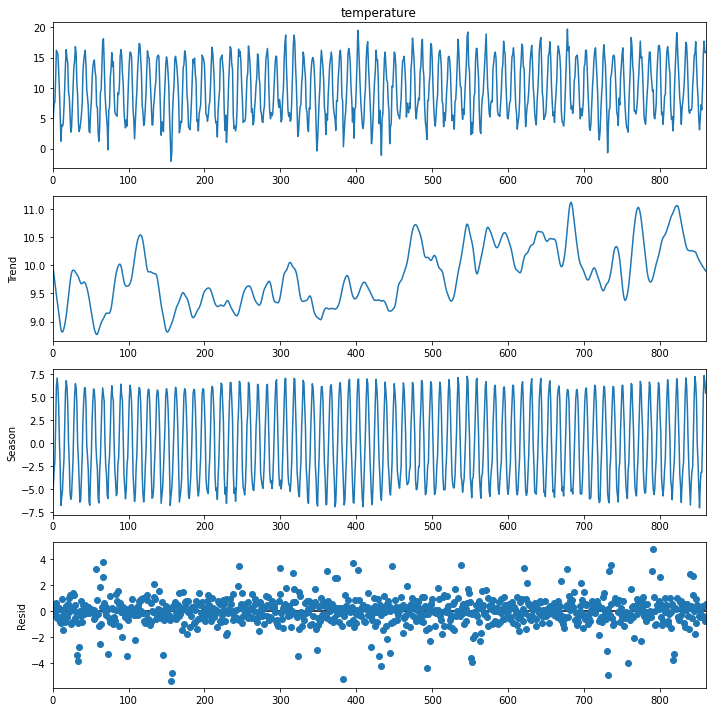

In [17]:
from statsmodels.tsa.seasonal import STL

stl = STL(dfw.temperature, period=12, robust=True)
res = stl.fit()
fig = res.plot()

We can observe that the STL decomposition gives a much smoother trend curve, the seasonal component has modulated amplitude, so is no longer periodic and the residual component still has no patterns and most points are now closer to zero than in the case of the classical decomposition.

We can print out the values of each of the components.

In [18]:
df_res = pd.DataFrame(np.c_[res.trend, res.seasonal, res.resid], columns=['trend', 'seasonal', 'resid'])
df_res.head(24)

,trend,seasonal,resid
0,10.030327,-5.558438,-0.271889
1,9.915826,-4.687813,0.071988
2,9.802590,-2.961576,0.558985
3,9.691072,-1.957751,-0.133321
4,9.581509,1.727438,-0.008947
5,9.474130,6.101014,0.624856
6,9.369090,7.074740,-0.543830
7,9.266195,6.083839,0.249966
8,9.165081,4.156817,-0.421898
9,9.064779,0.259674,0.275547


Detecting Outliers

Once again we look at the STL decomposition of the data, now in order to see if there are any unusually high or low temperatures (taking into account seasonality of data)

In [19]:
from statsmodels.tsa.seasonal import STL
stl = STL(dfw.temperature, period=12)

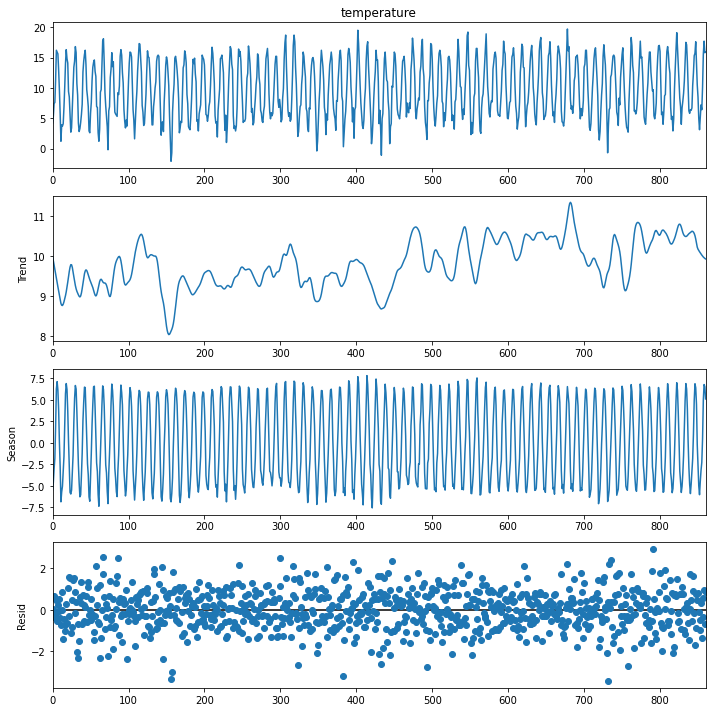

In [20]:
res = stl.fit()
fig = res.plot()

To detect outliers, we need to look at the residual component of the STL decomposition and see if we can detect any unusually high or low points. 
One of the measurements we can use is the interquartile range, which is the difference between the third quartile and the first quartile.

In [21]:
Q1 = np.percentile(res.resid, 25)
Q3 = np.percentile(res.resid, 75)
IQR = (Q3 - Q1)
IQR
#display interquartile range of the dataset

1.2473356702987086

To find outliers, we decide that any lower outlier must be below the first quartile by 1.5 of interquartile range (this would catch all unusually low values) and any upper outlier must be above the third quartile by 1.5 of interquartile range (this would catch all the unusually high values).

In [22]:
# Lower Bound Ouliers
print(res.resid[res.resid < (Q1 - 1.5*IQR)] )
lower_loc = np.where(res.resid < (Q1 - 1.5*IQR))

# Upper Bound Outliers
print(res.resid[res.resid > (Q3 + 1.5*IQR)] )
upper_loc = np.where(res.resid > (Q3 + 1.5*IQR))


156   -3.354423
157   -2.995146
323   -2.691753
383   -3.195979
433   -2.626466
493   -2.753917
731   -3.458940
758   -2.716545
Name: resid, dtype: float64
67     2.540740
86     2.527189
791    2.943294
Name: resid, dtype: float64


We see that we have 8 lower outiliers and 3 upper outiliers.

In [23]:
# dates on which outlier occurred
print(res.resid.index[lower_loc])
print(res.resid.index[upper_loc])

Int64Index([156, 157, 323, 383, 433, 493, 731, 758], dtype='int64')
Int64Index([67, 86, 791], dtype='int64')


Now we graph the lower outliers in red and the upper outliers in green on the graph of the time series.

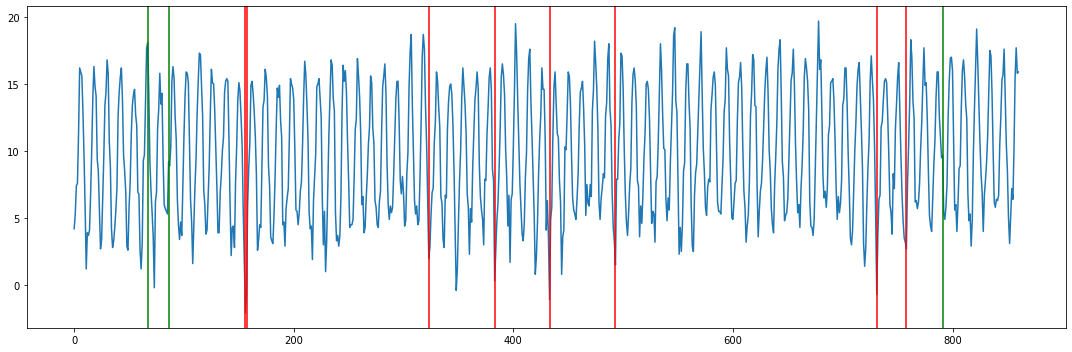

In [24]:
res.observed.plot(figsize=(15,5));
for i in range(8):
    plt.axvline(x = res.resid.index[lower_loc][i], color = 'r');
for i in range(3):  
    plt.axvline(x = res.resid.index[upper_loc][i], color = 'g');


Multiseasonal time series decomposition (MTSL)

MTSL is used when there is more than one period in the time series. Here the only period we have are yearly oscillations (period = 12), so MTSL is not necessary. We are going to imagine that the data has two periods: 12 and 36. We are going to see if it gives the same results as STL.

In [25]:
from statsmodels.tsa.seasonal import MSTL

In [26]:
print(dfw.head())
model = MSTL(dfw['temperature'], periods=(12, 36))
res = model.fit()

                    ds  temperature
0  1950-01-01 00:00:00          4.2
1  1950-02-01 00:00:00          5.3
2  1950-03-01 00:00:00          7.4
3  1950-04-01 00:00:00          7.6
4  1950-05-01 00:00:00         11.3


In [27]:
# assign date as index
res.observed.index = dfw['ds']
res.trend.index = dfw['ds']
res.seasonal.index = dfw['ds']
res.resid.index = dfw['ds']

This is the trend component

In [28]:
np.array(res.trend)[:10]

array([9.34538302, 9.34020187, 9.33538124, 9.33090436, 9.32673783,
       9.32284264, 9.31918231, 9.31571267, 9.31238672, 9.30915669])

Next we can look at the seasonal component

Notice that the seasonal component now has two values for each time: the seasonal_12 value corresponding to the period=12 and the seasonal_36 value, corresponding to the period=36. Notice that the seasonal_36 amplitude is about 10 times smaller than the seasonal_12 amplitude. This makes sense, because physically speaking, the period=36 oscillations are not there. 

In [29]:
np.array(res.seasonal)[:10]

array([[-6.0113411 ,  0.19885324],
       [-4.8045515 , -0.31596168],
       [-3.59440918,  0.42564009],
       [-1.55310551, -0.45077041],
       [ 2.27275678,  0.46155759],
       [ 5.71015821,  0.28256616],
       [ 6.90801545, -0.19842944],
       [ 6.40545951, -0.07318   ],
       [ 3.46140877,  0.36604813],
       [ 0.11229241,  0.15193656]])

This is the residual component

In [30]:
np.array(res.resid)[:10]

array([ 0.66710484,  1.08031131,  1.23338785,  0.27297156, -0.7610522 ,
        0.88443299, -0.12876832, -0.04799217, -0.23984362,  0.02661435])

Now we plot the original series, the trend, the seasonal_12, the seasonal_36 and the residual components.

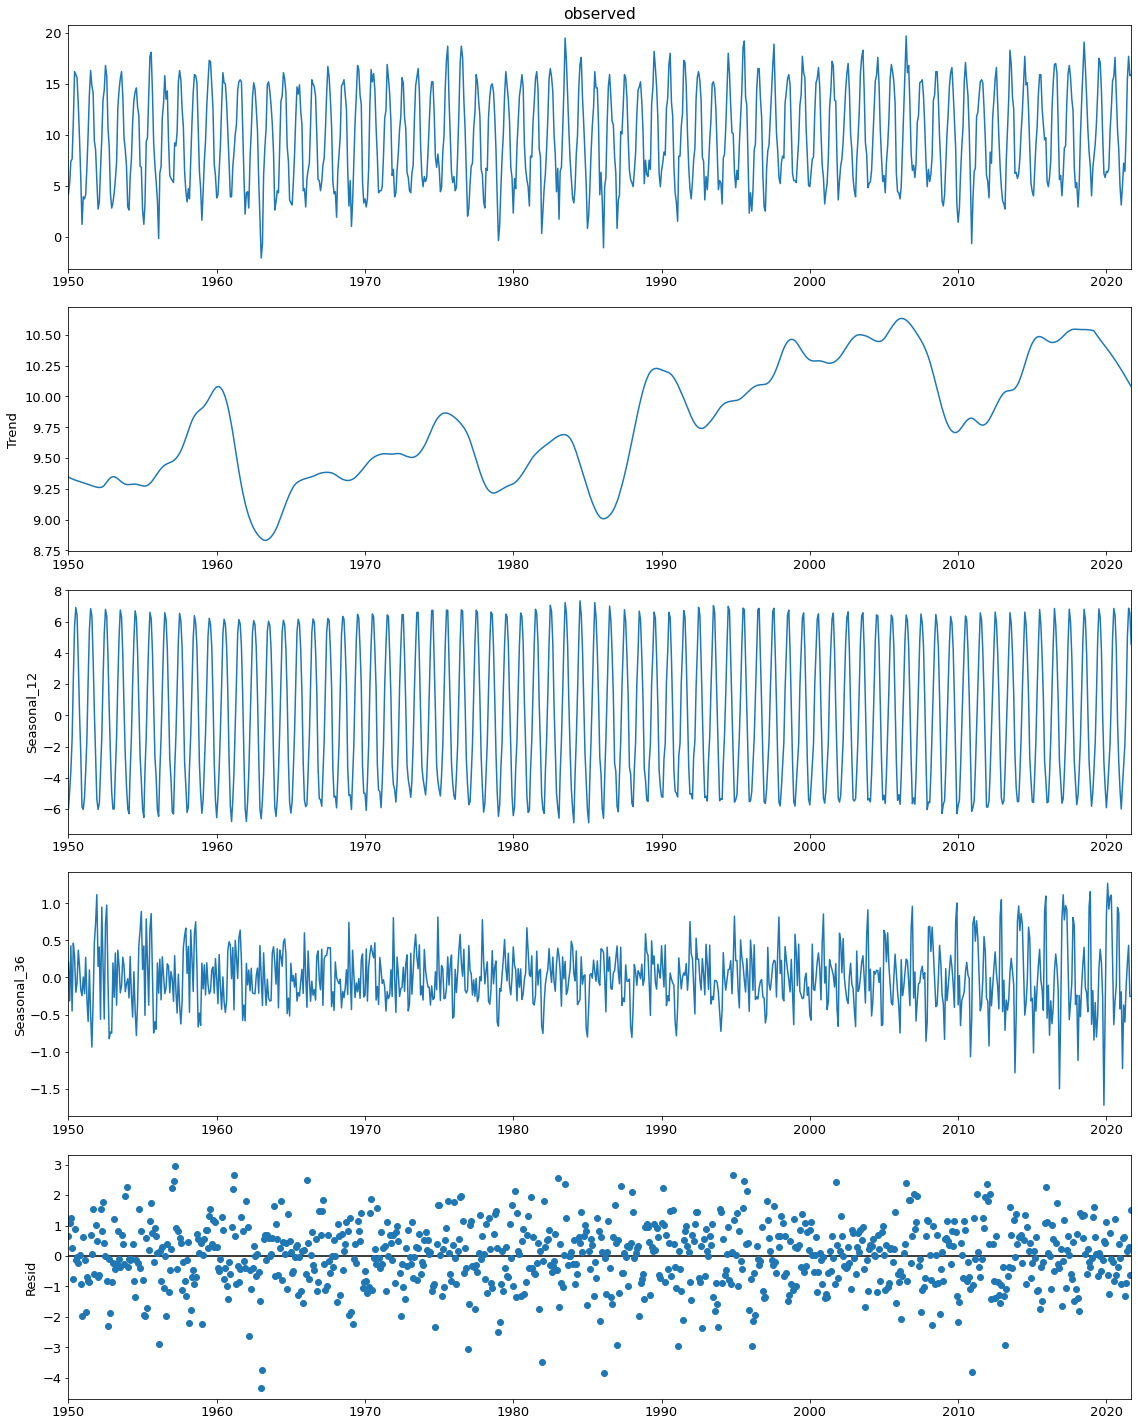

In [31]:
# Start with the plot from the results object `res`
plt.rc("figure", figsize=(16, 20))
plt.rc("font", size=13)
fig = res.plot()
plt.tight_layout()

Now we are going to put all of the components: trend, seasonal (period = 12), seasonal (period = 36) and residual on the same graph.

Observe that seasonal_36 component (shown as orange) has a very small amplitude compared with the other components.

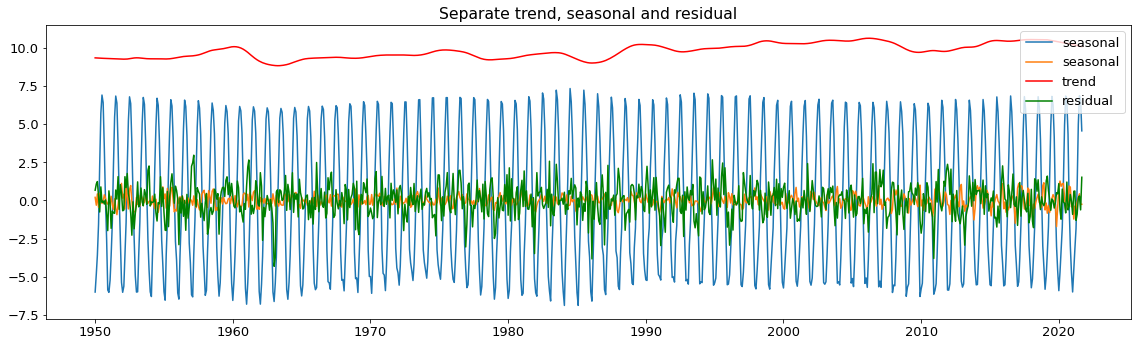

In [32]:
plt.figure(figsize=(16,5))
plt.plot(dfw['ds'], np.array(res.seasonal), label ="seasonal")
plt.plot(dfw['ds'], np.array(res.trend), label = "trend", color = 'r')
plt.plot(dfw['ds'], np.array(res.resid), label = "residual", color = 'g')
plt.legend(loc="upper right")
plt.title("Separate trend, seasonal and residual")
plt.show()

Detrending the time series

In some applications, it is very important to detrend the time series, i.e. to subtract the trend from the original time series.

There are several ways to detrend the time series. The most common methods are: subtract line of best fit,
subtract loess fit, subtract trend component from classical TS decomposition (~ i.e.subtract the moving average).


First method to detrend the series is to subtract the line obtained by linear regression. This works well in the case of a linear trend.

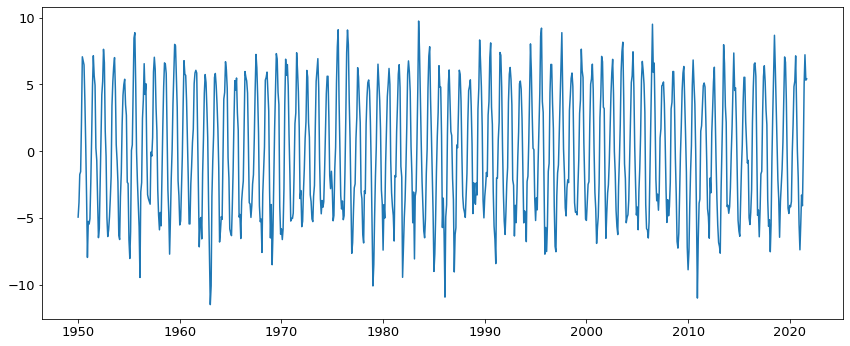

In [33]:
from scipy import signal
detrended = signal.detrend(dfw.temperature.values)
plt.figure(figsize=(12,5))
plt.plot(dfw['ds'], detrended)

The second way to detrend a series is to subtract the Loess trend (the curve obtained by using linear regression locally). This works better in the cases of a non-linear trend.

In [34]:
import statsmodels.api as sm

In [35]:
x = np.arange(dfw.temperature.values.shape[0])
y = dfw.temperature.values

In [36]:
# Fit Lowess. Larger the frac, smoother the fit.
smoothed = sm.nonparametric.lowess(exog=x, endog=y, frac=0.2)
df_s = pd.DataFrame(smoothed)
df_s.head()

,0,1
0,0.0,8.994201
1,1.0,9.000773
2,2.0,9.007344
3,3.0,9.013917
4,4.0,9.020495


Here is the graph of the Loess smoothed trend.

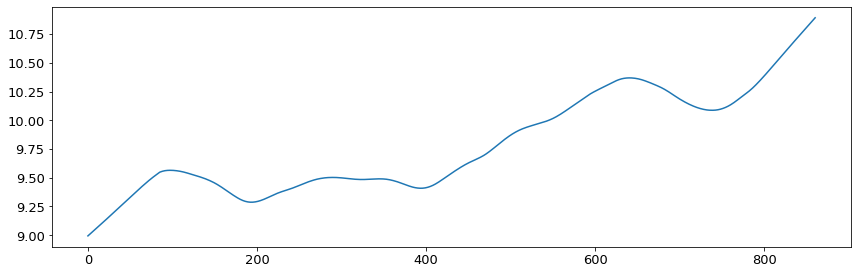

In [56]:
# loess smoothed trend
df_s.iloc[:, 1].plot(figsize=(12,4));

Now we can subtract the Loess smoothed trend from the original time series and graph the detrended series.

<AxesSubplot:>

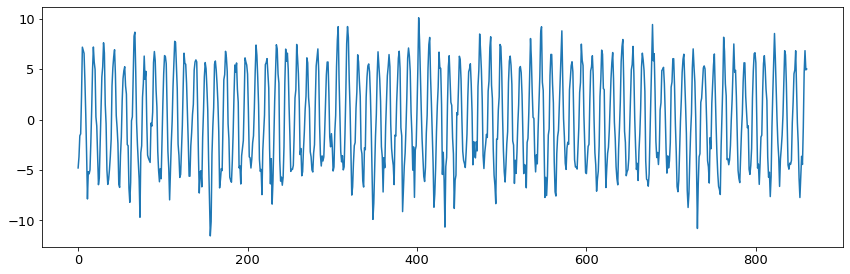

In [38]:
#Subtract the loess trend from the original series

dfw_detrended = dfw.temperature.values - df_s.iloc[:, 1]
dfw_detrended.plot(figsize=(12,4))


The third method uses the HP Filter to subtract the cyclic component of the time series.

The advantage of using the HP Filter is that it gives a much smoother trend than the other methods.

In [39]:
#Subtract the cyclic trend from hpfilter

from statsmodels.tsa.filters import hp_filter
cycle, trend = hp_filter.hpfilter(dfw.temperature.values, 129600)


The graph shows both the smooth trend and the cyclic component separated by the HP Filter.

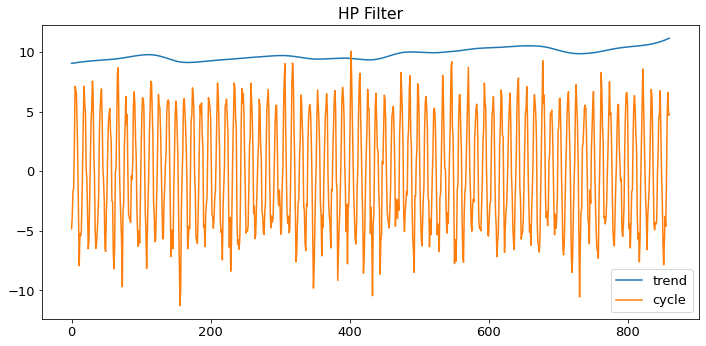

In [40]:
pd.DataFrame({"trend":trend, "cycle":cycle}).plot(figsize=(10,5), title="HP Filter");

Now we can subtract the trend from the original time series and graph the detrended time series.

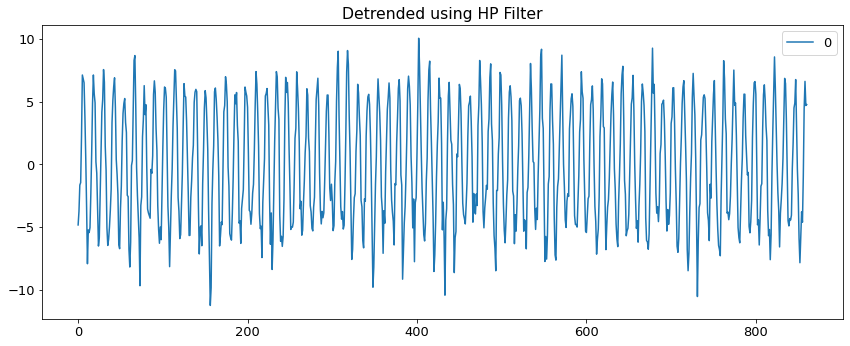

In [41]:
df_detrended_hp = dfw.temperature.values - trend
pd.DataFrame(df_detrended_hp).plot(title="Detrended using HP Filter", figsize=(12,5));

How to deseasonalize the time series

Sometimes, the seasonal component of the series is well understood and other components are of more interest. 

This is for example the case if you wish to study global warming. 

In this case, it would be very interesting to deseasonalize the series. 

There are several methods to deseasonalize the series. We shall discuss the following methods: first is taking seasonal difference the series, that is, subtracting the value of previous season from the current value; second is
subtracting from the series the seasonal index obtained from STL decomposition.



First method: subtracting the temperature values for a given month last year from the temperature values for the same month this year (for all of the months).

12    -0.3
13    -1.6
14    -3.3
15    -0.8
16    -1.2
      ... 
856   -2.4
857    0.2
858    2.0
859   -1.8
860    2.0
Name: temperature, Length: 849, dtype: float64

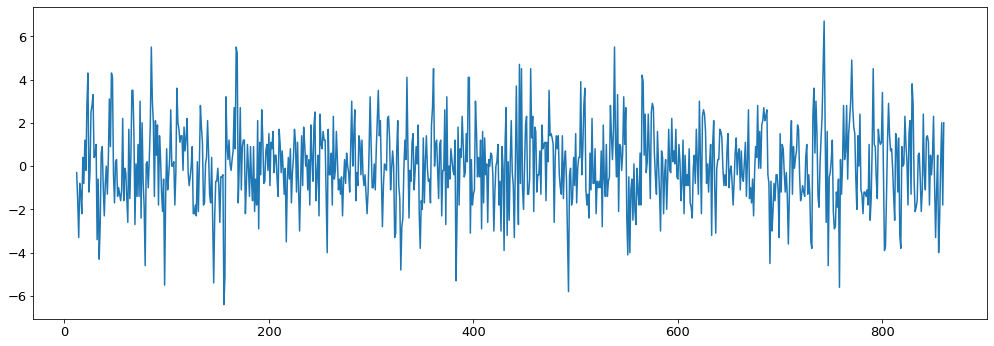

In [55]:
# Subtract same temperature from previous season, i.e. the temperature for the same month but last year
df_deseason = dfw.temperature.diff(12)
df_deseason.plot(figsize=(14,5));
df_deseason[12:]

Second method: subtracting the series by the seasonal index obtained using the STL decomposition.

Find the seasonal trend from STL decomposition of the time series.

In [44]:
#first we find the seasonal trend from STL decomposition
from statsmodels.tsa.seasonal import STL
stl = STL(dfw['temperature'], period=12)
res = stl.fit()
res.seasonal

0     -5.442239
1     -4.609282
2     -3.020682
3     -1.785461
4      1.904830
         ...   
856    0.470482
857    4.975440
858    6.794704
859    6.538010
860    5.110823
Name: season, Length: 861, dtype: float64

Now we subtract the seasonal component from the original series.

<AxesSubplot:>

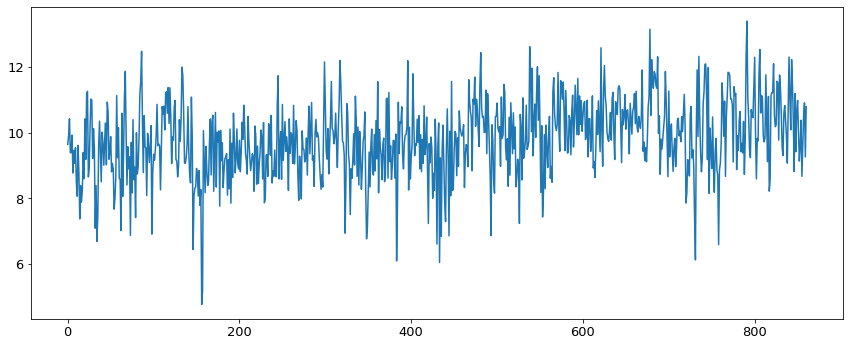

In [45]:
# Deseasonalize the series
df_deseason_stl = (dfw['temperature'].values - res.seasonal)
df_deseason_stl.plot(figsize=(12,5))

Finding autocorrelation functions.

Autocorrelation function attempts to measure the current values of temperature against the previous values of temperature.

Autocorrelation function of a periodic time series has the same period as the series itself.

Therefore studying autocorrelation functions allows us to determine if a time series has a periodic component and to find its period.

In [46]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

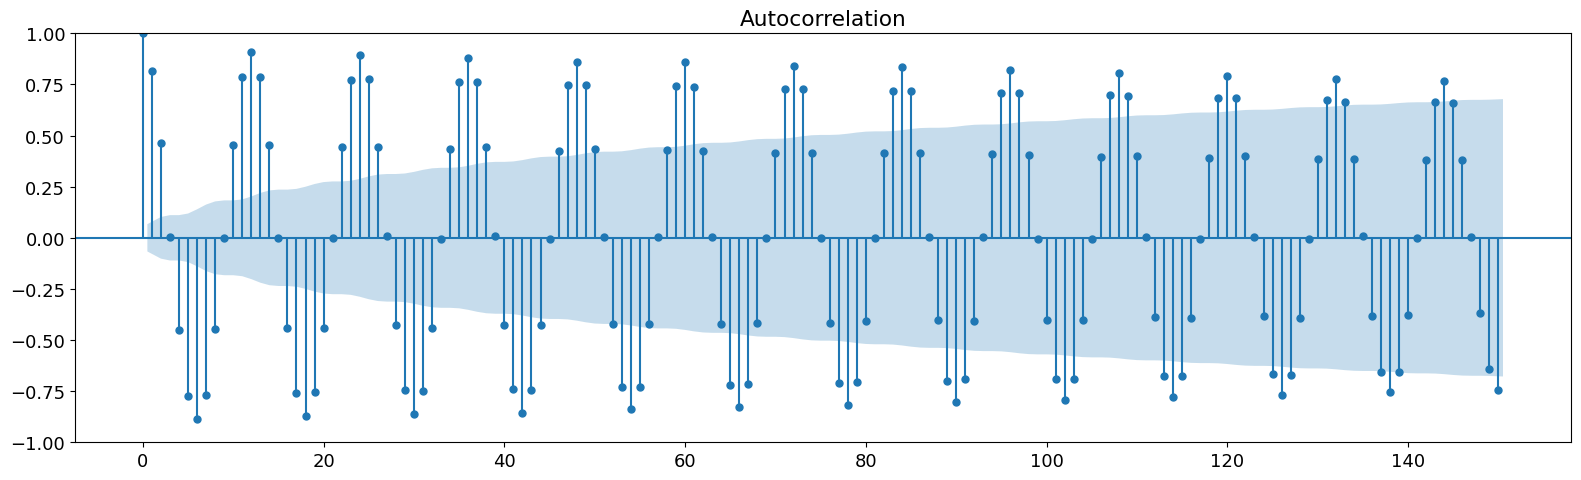

In [47]:
# Calculate ACF and PACF upto 50 lags
acf_50 = acf(dfw.temperature, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,1,figsize=(16,5), dpi= 100)
plot_acf(dfw.temperature.tolist(), lags=150, ax=axes);

Here we can see from the graph of the autocorrelation functions that the time series has a strong periodic component with period = 12 but that the time series is not strictly periodic since the autocorrelation functions are dacaying slowly.

Finding Partial Autocorrelation functions.

The partial autocorrelation function tells us the relationship of the current value of time series with the value of time series at lag = k, with the influence of all intermediate values of the time series removed. This way it tells us the direct relationship between the current value and a previous value at lag = k.

For periodic time series, partial autocorrelation functions should show periodic behavior with the same period. 

If the time series has a cyclic component, the partial autocorrelation function would have a periodic component as well, which would allow us to get the period of the seasonal part of the time series.



In [48]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

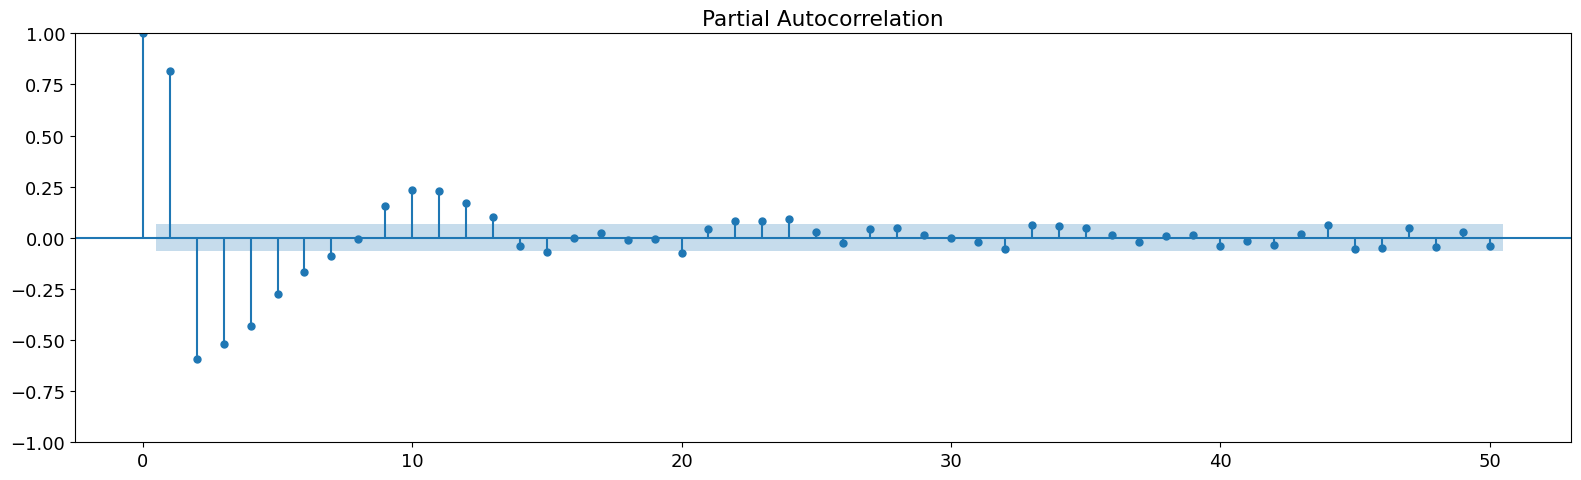

In [49]:
# Calculate ACF and PACF upto 50 lags
acf_50 = pacf(dfw.temperature, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,1,figsize=(16,5), dpi= 100)
plot_pacf(dfw.temperature.tolist(), lags=50, ax=axes);

Here we can see from the graph of PACF, that the time series has a periodic component of period=12, but since the PACF is decaying rather quickly, the current value of the temperature is not strongly correlated with the value of the temperature a year ago (lag=12).

Finding if a time series is stationary.

Unit root is a characteristic of a time series which makes it non-stationary. 

Unit root is said to exist for a time series Y(t) if Y(t) = Y(t-1) + b X + e, where X is an extraneous explanatory variable, and e is the noise.

Augmented Dickey-Fuller test is a unit root test to test if a series Y(t) is of the form Y(t) = c + b t + a Y(t-1) + ...

The Null Hypothesis is: a = 1

To reject the Null Hypothesis, the p-value should be less than 0.05. If Null Hypothesis is accepted, the series Y(t) is non-stationary and the series should be differenced in order to make it stationary.

If p-value is less than 0.05, the Null Hypothesis is rejected and the series is considered stationary.


In [50]:
from statsmodels.tsa.stattools import adfuller, kpss

In [51]:
adfuller(dfw.temperature)

(-4.844600294826556,
 4.465100127237048e-05,
 21,
 839,
 {'1%': -3.438168140637663,
  '5%': -2.864991017121922,
  '10%': -2.5686076019468094},
 2943.0251666599625)

Since P-value is 0.00004465 < 0.05, we reject the null hypothesis that the series is non-stationary and conclude that the series is stationary.

KPSS test, Kwiatkowski-Phillips-Schmidt-Shin test is a type of unit root test that tests a given series around a deterministic trend.

Null Hypothesis: time series is stationary.

If p-value is less than 0.05, Null Hypothesis is rejected and series is non-stationary.

KPSS test is different from ADF test because it tests for stationarity around a deterministic trend (i.e. the slope of the trend does not change permanently).


In [52]:
kpss(dfw.temperature)

(0.3574543434111994,
 0.09549381749517266,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Since P-value is 0.0954 > 0.05, we fail to reject the null hypothesis that the series is stationary.

The time series of temperatures is classified as stationary. The reason is that the global warming trend is slow enough not to be detected by ADF and KPSS tests.